In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance
from scipy.optimize import minimize, differential_evolution
from scipy.misc import derivative
from sympy import diff, symbols, cos, sin, tan

from sklearn.decomposition import PCA, TruncatedSVD
import pandas as pd
%matplotlib inline

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

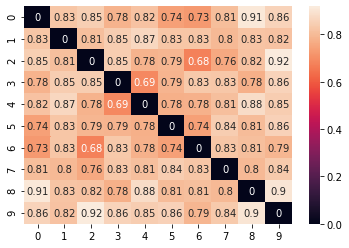

In [3]:
def get_cosine(user, raitings=raitings):
    cosn = []
    cosn.append(np.abs(1 - np.apply_along_axis(distance.cosine, -1, raitings, user)))
    cosn = np.array(cosn)
    cosn[cosn == 1] = 0 # не учитываем растояния между  одними и теме же векторами
    return cosn[0,:]

cosine_matrix = np.apply_along_axis(get_cosine, -1, raitings)

sns.heatmap(cosine_matrix, annot=True);

In [4]:
for i, idx in enumerate(cosine_matrix.argmax(0)):
    print(f'Пользователь {i} наиболее похож на пользователя {idx} c косинусной метрикой {cosine_matrix[i,idx]}' )

Пользователь 0 наиболее похож на пользователя 8 c косинусной метрикой 0.9106598233573044
Пользователь 1 наиболее похож на пользователя 4 c косинусной метрикой 0.871380522393023
Пользователь 2 наиболее похож на пользователя 9 c косинусной метрикой 0.9187305147356806
Пользователь 3 наиболее похож на пользователя 9 c косинусной метрикой 0.8588686958710953
Пользователь 4 наиболее похож на пользователя 8 c косинусной метрикой 0.8794847716076254
Пользователь 5 наиболее похож на пользователя 9 c косинусной метрикой 0.8551490764118893
Пользователь 6 наиболее похож на пользователя 3 c косинусной метрикой 0.8327421070557632
Пользователь 7 наиболее похож на пользователя 5 c косинусной метрикой 0.8445168512565343
Пользователь 8 наиболее похож на пользователя 0 c косинусной метрикой 0.9106598233573044
Пользователь 9 наиболее похож на пользователя 2 c косинусной метрикой 0.9187305147356806


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [5]:
pca = PCA(n_components=5)
pca_raitings = pca.fit_transform(raitings)

[8 4 9 9 8 9 3 5 0 2] [5 9 6 4 3 0 2 9 3 7]


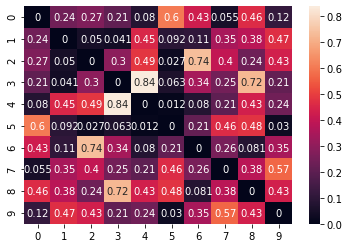

In [6]:
cosine_matrix_ = np.apply_along_axis(get_cosine, -1, pca_raitings, raitings=pca_raitings)
print(cosine_matrix.argmax(0), cosine_matrix_.argmax(0))
sns.heatmap(cosine_matrix_, annot=True);

In [7]:
svd = TruncatedSVD(n_components=5, n_iter=100, random_state=42)
svd_raitings = svd.fit_transform(raitings)

[8 4 9 9 8 9 3 5 0 2] [8 4 9 7 8 7 7 5 0 2]


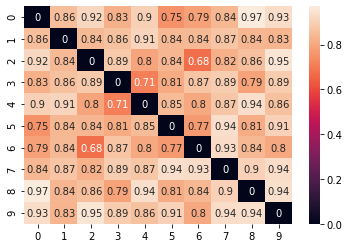

In [8]:
cosine_matrix_svd = np.apply_along_axis(get_cosine, -1, svd_raitings, raitings=svd_raitings)
print(cosine_matrix.argmax(0), cosine_matrix_svd.argmax(0))
sns.heatmap(cosine_matrix_svd, annot=True);

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

chain rule)

$tg^2(sin(x) + cos(2x+3))$

$2tg(sin(x) + cos(2x+3))\frac{d}{dx}(tg(sin(x) + cos(2x+3))$

$2tg(sin(x) + cos(2x+3))*sec^2(sin(x) + cos(2x+3)\frac{d}{dx}((sin(x) + cos(2x+3))$

$2tg(sin(x) + cos(2x+3))*sec^2(sin(x) + cos(2x+3)\frac{d}{dx}((sin(x) + cos(2x+3))$

$2tg(sin(x) + cos(2x+3))*sec^2(sin(x) + cos(2x+3)(\frac{d}{dx}(sin(x) + \frac{d}{dx}cos(2x+3))$

$2tg(sin(x) + cos(2x+3))*sec^2(sin(x) + cos(2x+3)((cos(x) -2sin(2x+3))$

$x_0 = 1$


In [9]:
2 * np.tan(np.sin(1) + np.cos(2*1+3))* \
(np.cos(1) -2*np.sin(2*1+3))* \
(1/np.cos(np.sin(1) + np.cos(2*1+3)))**2

55.38591763533785

In [10]:
x = symbols('x')
dx1 = diff(tan(sin(x) + cos(2*x+3))**2)
print(dx1, dx1.evalf(subs={x:1.0}), sep='\n')

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
55.3859176353379


In [11]:
def f(x):
    return np.tan(np.sin(x) + np.cos(2*x+3))**2
derivative(f, 1.0, dx=1e-6 , n=1)

55.3859176464222

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [25]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [26]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [27]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [28]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [29]:
a = np.linspace(5, 10, 300)
b = np.linspace(-0.5, 0.5, 300)

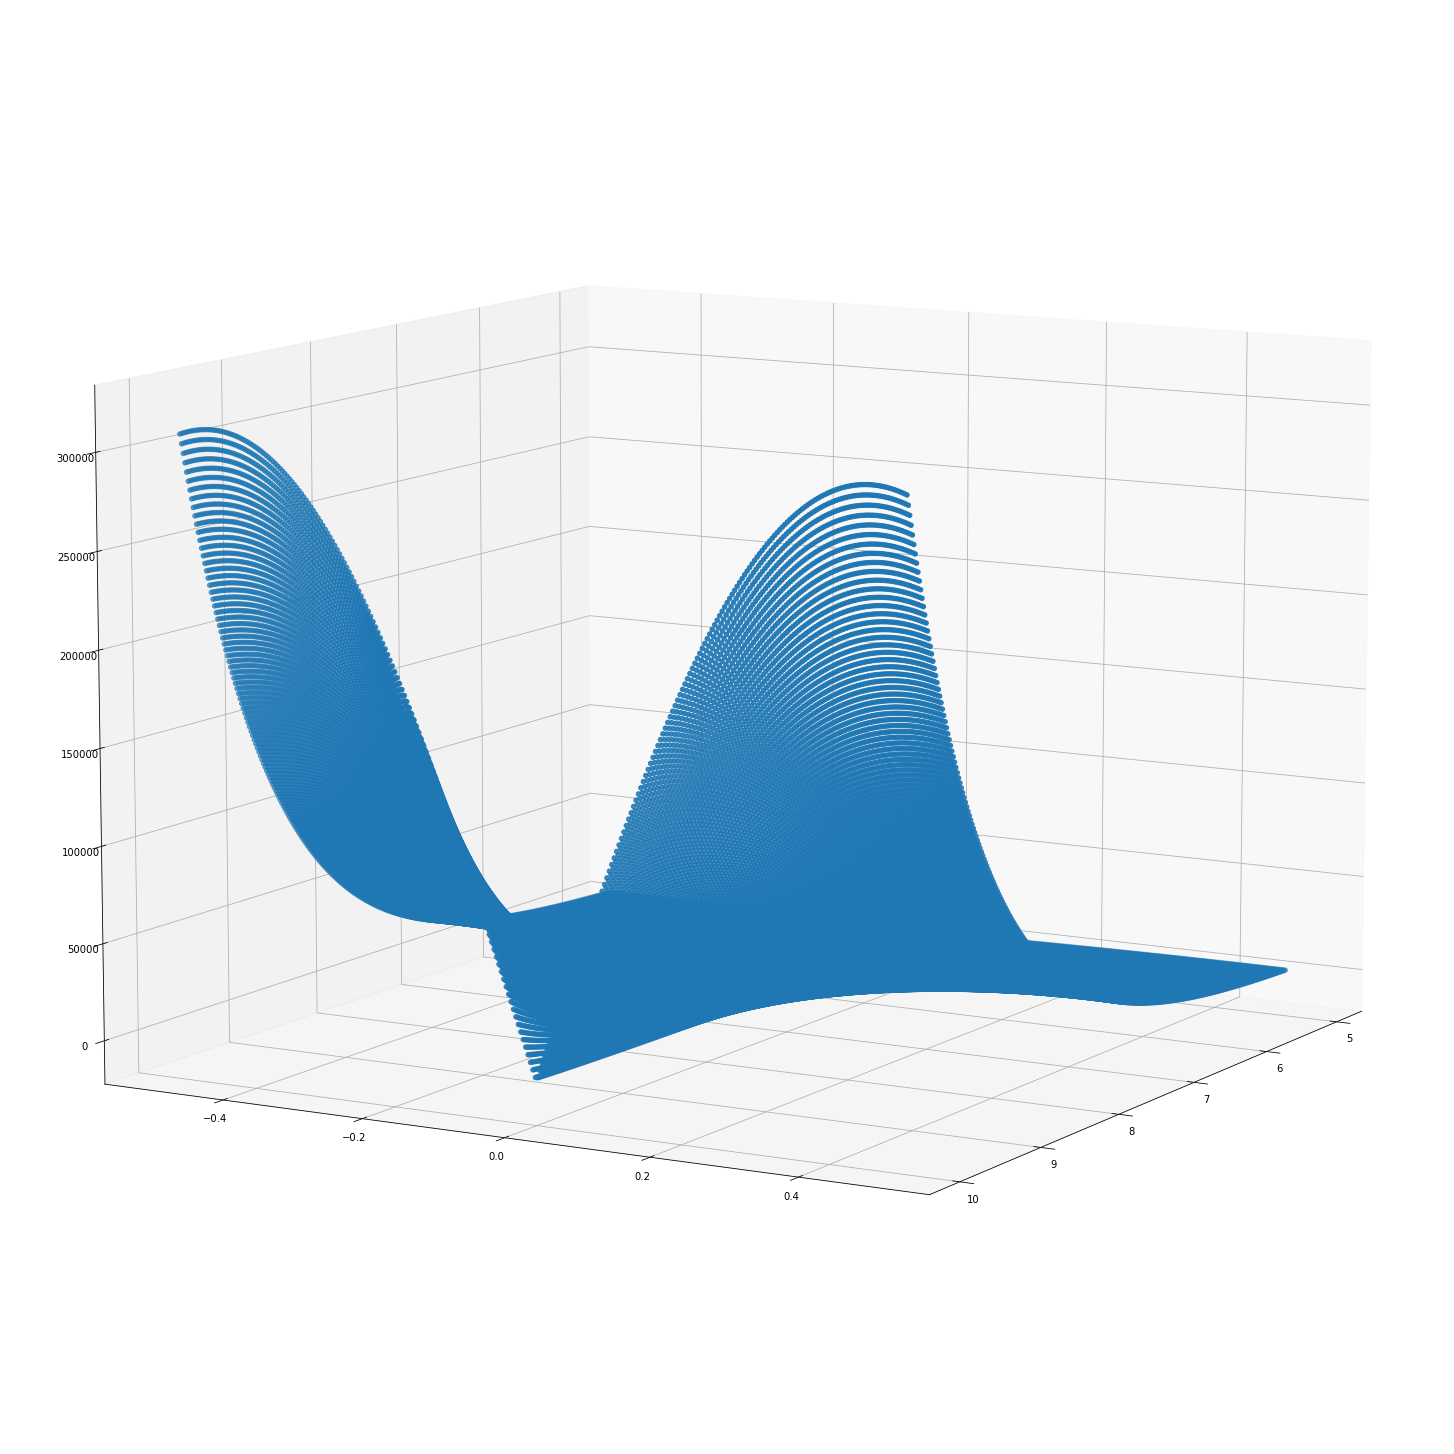

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

err = []
param = []
for a_0 in a:
    for b_0 in b:
        param.append([a_0, b_0])
        err.append(error([a_0, b_0]))

fig = plt.figure(figsize=[20, 20])

ax = Axes3D(fig)
# Задаем угол обзора
ax.view_init(10, 30)

ax.scatter(np.array(param)[:,0], np.array(param)[:,1], np.array(err))
plt.show()

In [31]:
minimize(error, (10, 0), method='COBYLA',
               options={'xatol': 1e-8, 'disp': True})

     fun: 274.16557160652997
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 28
  status: 1
 success: True
       x: array([9.99999999e+00, 1.99999999e-04])

In [32]:
bounds = [(-50, 50), (-50, 50)]
result = differential_evolution(error, bounds, seed=42)
result

     fun: 232.95895947643564
     jac: array([  2.90934851, -26.65518714])
 message: 'Optimization terminated successfully.'
    nfev: 372
     nit: 3
 success: True
       x: array([  1.60836428, -12.51239593])

In [33]:
error(result.x)

232.95895947643564

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [21]:
sample = np.random.randint(0, 21, 50)
sample

array([ 1,  2,  3, 10,  8,  3,  8,  6, 10, 17, 20, 10, 16,  3,  9, 12, 20,
       15,  2,  6,  8, 13,  1,  5, 10,  4,  0, 15, 17,  9, 15, 10, 17,  9,
       11,  9, 16, 19, 12,  1,  9, 12, 13,  2,  9,  6,  3,  9,  1, 14])

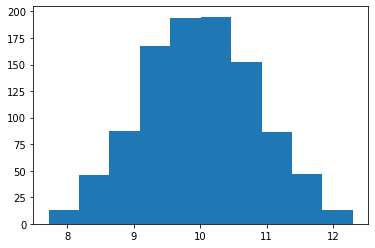

In [22]:
sample_mean = np.array([])
for i in range(1000):
    sample = np.random.randint(0, 21, 50)
    sample_mean = np.append(sample_mean, sample.mean())
plt.hist(sample_mean);

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [23]:
m = np.array([[1, 4], [1, 1]])
num, vec = np.linalg.eig(m)
m, num, vec

(array([[1, 4],
        [1, 1]]),
 array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

В матричной форме:
\begin{equation*}
\begin{bmatrix}
1& 4\\
1& 1
\end{bmatrix}
\times
\begin{bmatrix}
x\\
y
\end{bmatrix}
= \lambda \times
\begin{bmatrix}
x\\
y
\end{bmatrix}
\end{equation*}

 система линейтых уравнений:
 
$x + 4y = \lambda x $
 
$x + y = \lambda y $

т.е.

$x(1 - \lambda)  + 4y = 0$

$x + (1 - \lambda)y = 0$

Так как собственный вектор не может быть нулевым, по определению, следовательно уравнения линейно независимы и отределитель матрицы равен нулю:

\begin{equation*}
\begin{bmatrix}
1 - \lambda & 4\\
1 & 1 - \lambda
\end{bmatrix}
= 0
\end{equation*}

$ (1 - \lambda)(1 - \lambda) - 4 = 0$

$ 1 - 1\lambda - 1\lambda + \lambda ^2  - 4= 0$

$ \lambda ^2 -2\lambda -3 = 0$

$ D = 4 - 4\times 1 \times (-3) = 4 + 12 = 16; \sqrt D = 4$

$ \lambda_{1,2} =  \frac{2 \pm 4}{2}$

\begin{equation*}
\lambda_{1,2} = 
\begin{bmatrix}
-1\\
3
\end{bmatrix}
\end{equation*}

Ищем собственный вектор для $\lambda = -1 $ ;

$x(1 - \lambda)  + 4y = 0$

$x + (1 - \lambda)y = 0$

$x(1 + 1)  + 4y = 0$

$x + (1 + 1)y = 0$


$x  + 2y = 0$


Здесь частное решение, например:

\begin{equation*}
\begin{bmatrix}
х\\
y
\end{bmatrix}
 = 
\begin{bmatrix}
1\\
-0.5
\end{bmatrix}
\end{equation*}

Ищем собственный вектор для $\lambda = 3 $ ;

$x(1 - 3)  + 4y = 0$

$x + (1 - 3)y = 0$

$-x+2y=0$

$x-2y=0$

Здесь частное решение, например:

\begin{equation*}
\begin{bmatrix}
х\\
y
\end{bmatrix}
 = 
\begin{bmatrix}
1\\
0.5
\end{bmatrix}
\end{equation*}

Проверяем решение:

In [24]:
print(m.dot(np.array([1,-0.5])), -1 * np.array([1,-0.5]))
print(m.dot(np.array([1,0.5])), 3 * np.array([1,0.5]))

[-1.   0.5] [-1.   0.5]
[3.  1.5] [3.  1.5]
